# Perceptron

The perceptron is an algorithm for supervised learning of binary classifiers. It can be seen as a single unit of artificial neural network and also known as the prototype for Neural Nets.

Single layer perceptron: Can learn only linearly separable patterns. <br>
Multilayer perceptron: Can learn more complex patterns. <br>

Neuron: It is simplified model of biological neuron and simulates the behaviour of one cell.

$$f(x) = w^{T} x + b$$

$$\hat{y} = g(f(x)) = g(w^{T}x + b)$$

Perceptron Update rule: <br>
For each training sample $x_{i}$: <br>
$w = w + \Delta{w}$ <br>
$b = b + \Delta{b}$ <br>
$\Delta{w} = \alpha (y_{i} - \hat{y_{i}}) x_{i}$ <br>
$\Delta{b} = \alpha (y_{i} - \hat{y_{i}})$ <br>
$\alpha$ = learning rate in [0, 1]<br>

Training: <br>
* Initialize weights
* For each sample: <br>
    * Calculate $\hat{y} = g(f(x)) = g(w^{T}x + b)$
    * Apply update rule: $\Delta{w} = \alpha (y_{i} - \hat{y_{i}}) x_{i}$, $\Delta{b} = \alpha (y_{i} - \hat{y_{i}})$ 
    
Prediction:
* Calculate $\hat{y} = g(f(x)) = g(w^{T}x + b)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
def unit_step_function(x):
    """
    Define the unit step function.

    Parameters:
    - x: The input value.

    Returns:
    - result: The output of the unit step function.
    """
    return np.where(x > 0, 1, 0)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        """
        Initialize the perceptron model with a learning rate and the number of iterations.

        Parameters:
        - learning_rate: The learning rate for updating the weights.
        - n_iters: The number of training iterations.

        Notes:
        - The default activation function used is the unit step function.
        """
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_function = unit_step_function
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fit the perceptron model to the training data.

        Parameters:
        - X: The input features of the training data.
        - y: The target values of the training data.
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y > 0, 1, 0)
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        """
        Make predictions for the given input data.

        Parameters:
        - X: The input features of the data points to predict.

        Returns:
        - y_predicted: The predicted target values.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

In [3]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [4]:
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


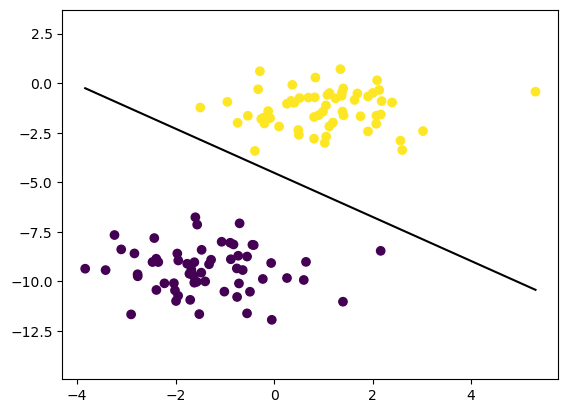

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()